In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from clip_pretrained import CLIP
from utils import get_split
import config as cfg
from test import get_image_embeddings
from test import find_matches


/home/toto/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.getcwd()

'/home/toto/Stuff/NeuralNet-Variety/CLIP/inference'

In [3]:

model=CLIP(temperature=cfg.temperature, image_embeddings=cfg.image_embeddings, text_embeddings=cfg.text_embeddings)
optimizer=optim.Adam(model.parameters(),lr=cfg.lr,weight_decay=cfg.weight_decay)

In [4]:
PATH="./state/checkpoint.ptbest_model.pt"
checkpoint = torch.load(PATH)
checkpoint=checkpoint[0]


In [ ]:
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer '])
epoch = checkpoint['epoch ']
loss = checkpoint['best_loss ']
model.eval()

In [6]:
image_embd=get_image_embeddings(model)

100%|██████████| 1012/1012 [10:01<00:00,  1.68it/s]


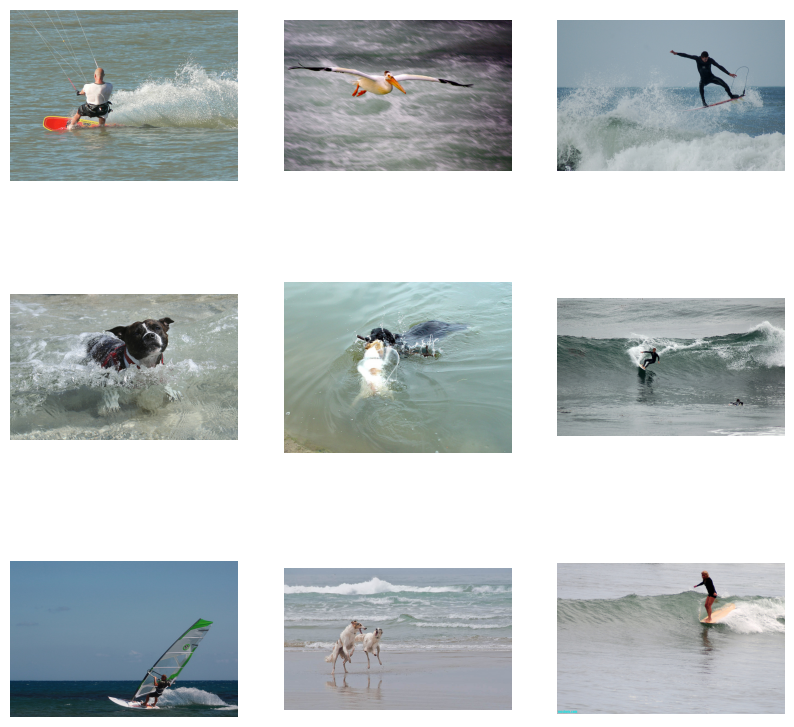

In [7]:
valid_df=get_split("valid")
find_matches(model,image_embd," a horse sitting in a tree",image_filenames=valid_df["image"].values)